In [227]:
## PS : make a website where user will enter name of a movie and top 5 similar movies will be recommeded to him

# Importing libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Importing dataset

In [159]:
credits=pd.read_csv("tmdb_5000_credits.csv",on_bad_lines='warn')
movies=pd.read_csv("tmdb_5000_movies.csv")

## Looking at datset

In [160]:
pd.set_option('display.max_columns',None)

In [161]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [162]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Merging datasets

In [163]:
ds=movies.merge(credits,on='title')

In [164]:
ds.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# EDA

## Overall summary

In [165]:
ds.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [166]:
features=ds.columns
print(features)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [167]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

## Numerical features

### Selecting numerical variables

In [168]:
num_features=ds.select_dtypes(include=[np.number])

### Summarizing numerical variables

In [169]:
num_features_stats=num_features.describe().T
print(num_features_stats)

               count          mean           std  min           25%  \
budget        4809.0  2.902780e+07  4.070473e+07  0.0  780000.00000   
id            4809.0  5.712057e+04  8.865337e+04  5.0    9012.00000   
popularity    4809.0  2.149166e+01  3.180337e+01  0.0       4.66723   
revenue       4809.0  8.227511e+07  1.628379e+08  0.0       0.00000   
runtime       4807.0  1.068823e+02  2.260254e+01  0.0      94.00000   
vote_average  4809.0  6.092514e+00  1.193989e+00  0.0       5.60000   
vote_count    4809.0  6.903317e+02  1.234187e+03  0.0      54.00000   
movie_id      4809.0  5.712057e+04  8.865337e+04  5.0    9012.00000   

                       50%           75%           max  
budget        1.500000e+07  4.000000e+07  3.800000e+08  
id            1.462400e+04  5.859500e+04  4.594880e+05  
popularity    1.292159e+01  2.835053e+01  8.755813e+02  
revenue       1.917000e+07  9.291317e+07  2.787965e+09  
runtime       1.030000e+02  1.180000e+02  3.380000e+02  
vote_average  6.20

## Categorical features

### Selecting categorical features

In [170]:
cat_features=ds.select_dtypes(include=[object])

### summarizing categorical features

In [171]:
cat_features_stats=cat_features.describe().T
print(cat_features_stats)

                     count unique  \
genres                4809   1175   
homepage              1713   1691   
keywords              4809   4222   
original_language     4809     37   
original_title        4809   4801   
overview              4806   4800   
production_companies  4809   3697   
production_countries  4809    469   
release_date          4808   3280   
spoken_languages      4809    544   
status                4809      3   
tagline               3965   3944   
title                 4809   4800   
cast                  4809   4761   
crew                  4809   4776   

                                                                    top  freq  
genres                                    [{"id": 18, "name": "Drama"}]   372  
homepage                              http://www.missionimpossible.com/     4  
keywords                                                             []   412  
original_language                                                    en  4510  
origina

## Null values

In [172]:
num_features.isna().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
movie_id        0
dtype: int64

In [173]:
num_features = num_features.dropna(subset=['runtime'])

In [174]:
cat_null_val=cat_features.isnull().sum()
print(cat_null_val)

genres                     0
homepage                3096
keywords                   0
original_language          0
original_title             0
overview                   3
production_companies       0
production_countries       0
release_date               1
spoken_languages           0
status                     0
tagline                  844
title                      0
cast                       0
crew                       0
dtype: int64


In [175]:
cat_features = cat_features.dropna(subset=['release_date'])

## checking important features

### GRAPHS

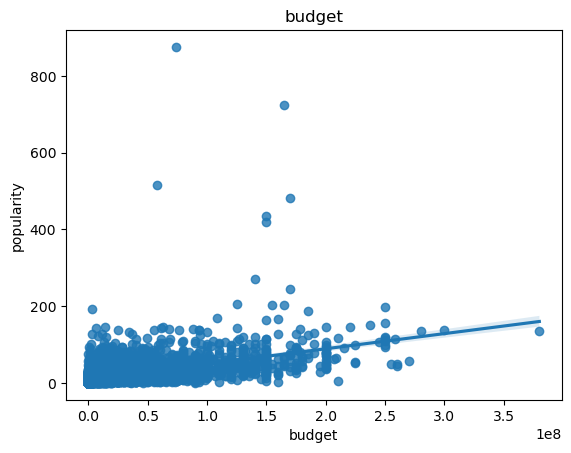

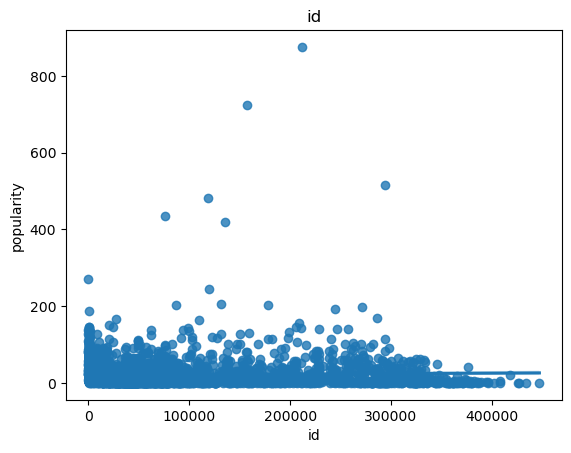

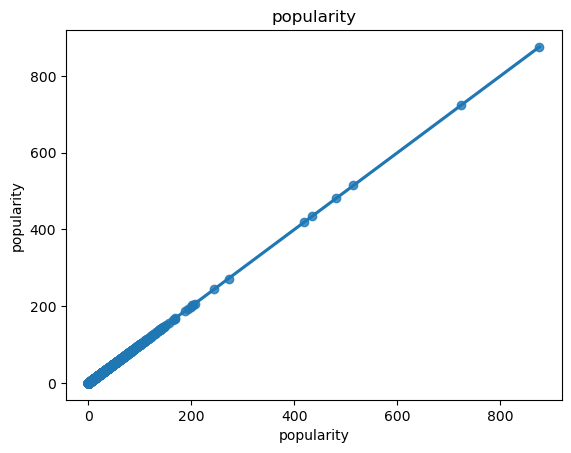

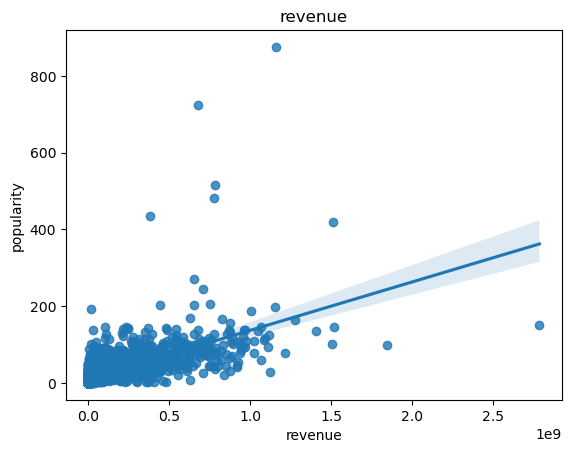

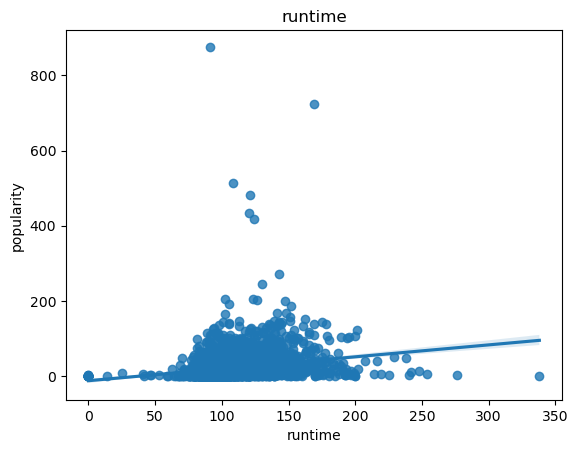

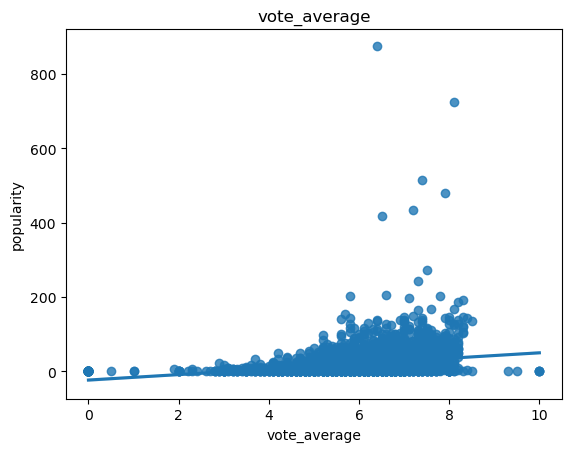

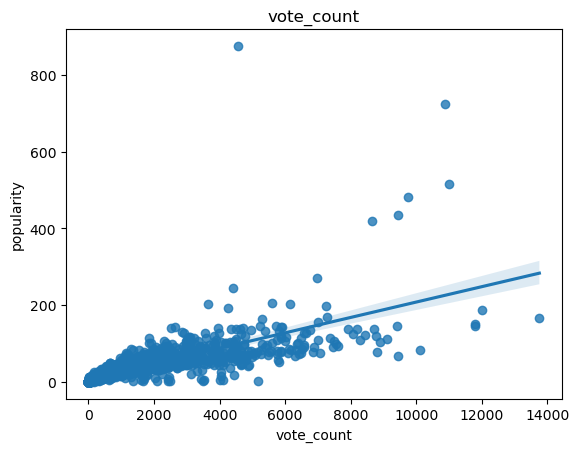

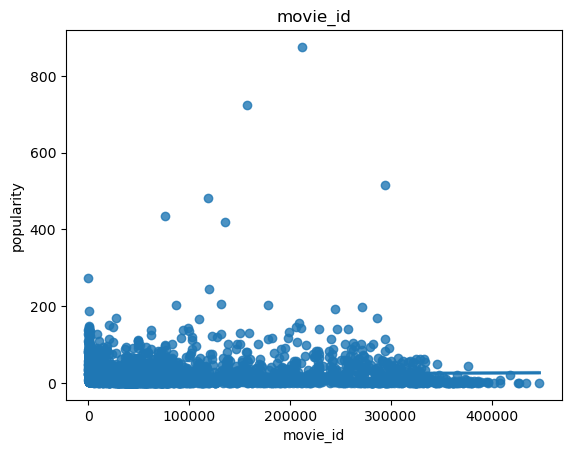

In [176]:
# num_features

for feature in num_features.columns:
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel("popularity")
  sns.regplot(x=num_features[feature], y=num_features["popularity"])
  plt.show()

In [177]:
# remove
# 1. runtime
# 2. vote average
# 3. id

# keep
# 1. movie id (for deployment)
# 2. votecount
# 3. revenue
# 4. budget
# 5. title
# 6. overview
# 7.geners
# 8.cast
# 9. crew
# 10.overview
# 11. keywords

## combining important elements

In [178]:
ds_sorted=ds[['budget', 'genres', 'keywords', 'overview', 'revenue','title','vote_count', 'movie_id', 'cast', 'crew']]

In [179]:
ds_sorted.head()

,budget,genres,keywords,overview,revenue,title,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",2787965087,Avatar,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",961000000,Pirates of the Caribbean: At World's End,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,880674609,Spectre,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,1084939099,The Dark Knight Rises,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",284139100,John Carter,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [180]:
#we need genere as action,romance,etc..
(ds_sorted.iloc[1,1])

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [181]:
# we need ["action","fantacy","adventure"]
import ast
ast.literal_eval
def converter(obj):
  l=[]
  for element in ast.literal_eval(obj):
   l.append(element['name'])
  return(l)

In [182]:
ds_sorted.loc[:,'genres']=ds_sorted.loc[:,'genres'].apply(converter)

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\1555043476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted.loc[:,'genres']=ds_sorted.loc[:,'genres'].apply(converter)


In [183]:
ds_sorted.loc[:,'genres'].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [184]:
import ast
ast.literal_eval
def converter(obj):
  l=[]
  for element in ast.literal_eval(obj):
   l.append(element['name'])
  return(l)

In [185]:
ds_sorted.loc[:,'keywords']=ds_sorted.loc[:,'keywords'].apply(converter)

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\296574811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted.loc[:,'keywords']=ds_sorted.loc[:,'keywords'].apply(converter)


In [186]:
ds_sorted.head()

,budget,genres,keywords,overview,revenue,title,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",2787965087,Avatar,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",961000000,Pirates of the Caribbean: At World's End,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,880674609,Spectre,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,1084939099,The Dark Knight Rises,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",284139100,John Carter,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [187]:
# we need 1st 3 actors in cast
ast.literal_eval
def converter_3(obj):
  l=[]
  counter=0
  for element in ast.literal_eval(obj):
    if counter!=3:
        l.append(element['name'])
        counter+=1
    else:
        break
  return(l)

In [188]:
ds_sorted.loc[:,'cast'] = ds_sorted.loc[:,'cast'].apply(converter_3)

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\4208883640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted.loc[:,'cast'] = ds_sorted.loc[:,'cast'].apply(converter_3)


In [189]:
ds_sorted.head()

,budget,genres,keywords,overview,revenue,title,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",2787965087,Avatar,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",961000000,Pirates of the Caribbean: At World's End,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,880674609,Spectre,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,1084939099,The Dark Knight Rises,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",284139100,John Carter,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [190]:
def fetch_director(obj):
    L=[]
    for element in ast.literal_eval(obj):
        if element['job']=='Director':
            L.append(element['name'])
            break
    return L

In [191]:
ds_sorted.loc[:,'crew'] = ds_sorted.loc[:,'crew'].apply(fetch_director)

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\2288786901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted.loc[:,'crew'] = ds_sorted.loc[:,'crew'].apply(fetch_director)


In [192]:
ds_sorted.head()

,budget,genres,keywords,overview,revenue,title,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",2787965087,Avatar,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",961000000,Pirates of the Caribbean: At World's End,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,880674609,Spectre,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,1084939099,The Dark Knight Rises,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",284139100,John Carter,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [194]:
ds_sorted['overview'] = ds_sorted['overview'].apply(lambda x: str(x).split())


C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\3653044650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted['overview'] = ds_sorted['overview'].apply(lambda x: str(x).split())


In [195]:
ds_sorted.head()

,budget,genres,keywords,overview,revenue,title,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",2787965087,Avatar,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",961000000,Pirates of the Caribbean: At World's End,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...",880674609,Spectre,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...",1084939099,The Dark Knight Rises,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",284139100,John Carter,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [196]:
# we need to remove spaces between name and surname..etc

In [198]:
ds_sorted['genres'] = ds_sorted['genres'].apply(lambda x:[i.replace(" ","") for i in x])
ds_sorted['keywords'] = ds_sorted['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
ds_sorted['cast'] = ds_sorted['cast'].apply(lambda x:[i.replace(" ","") for i in x])
ds_sorted['crew'] = ds_sorted['crew'].apply(lambda x:[i.replace(" ","") for i in x])

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\1773707726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted['genres'] = ds_sorted['genres'].apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\1773707726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted['keywords'] = ds_sorted['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\1773707726.py:3: SettingWithCopyWarning: 
A value i

In [203]:
ds_sorted.columns

Index(['budget', 'genres', 'keywords', 'overview', 'revenue', 'title',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [202]:
pd.set_option('display.max_columns',None)

In [212]:
ds_sorted.head()

,budget,genres,keywords,overview,revenue,title,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",2787965087,Avatar,11800,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",961000000,Pirates of the Caribbean: At World's End,4500,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,245000000,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",880674609,Spectre,4466,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,250000000,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",1084939099,The Dark Knight Rises,9106,49026,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,260000000,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",284139100,John Carter,2124,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [213]:
ds_sorted['tags']=ds_sorted['genres']+ds_sorted['keywords']+ds_sorted['overview']+ds_sorted['cast']+ds_sorted['crew']

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\756878352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_sorted['tags']=ds_sorted['genres']+ds_sorted['keywords']+ds_sorted['overview']+ds_sorted['cast']+ds_sorted['crew']


In [217]:
dsf=ds_sorted[['movie_id','title','budget','revenue','vote_count','tags']]

In [218]:
dsf

,movie_id,title,budget,revenue,vote_count,tags
0,19995,Avatar,237000000,2787965087,11800,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,4500,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,245000000,880674609,4466,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,250000000,1084939099,9106,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,260000000,284139100,2124,"[Action, Adventure, ScienceFiction, basedonnov..."
...,...,...,...,...,...,...
4804,9367,El Mariachi,220000,2040920,238,"[Action, Crime, Thriller, unitedstates–mexicob..."
4805,72766,Newlyweds,9000,0,5,"[Comedy, Romance, A, newlywed, couple's, honey..."
4806,231617,"Signed, Sealed, Delivered",0,0,6,"[Comedy, Drama, Romance, TVMovie, date, loveat..."
4807,126186,Shanghai Calling,0,0,7,"[When, ambitious, New, York, attorney, Sam, is..."


In [222]:
dsf['tags']=dsf['tags'].apply(lambda x:" ".join(x))

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\1886232220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsf['tags']=dsf['tags'].apply(lambda x:" ".join(x))


In [223]:
dsf.head()

,movie_id,title,budget,revenue,vote_count,tags
0,19995,Avatar,237000000,2787965087,11800,Action Adventure Fantasy ScienceFiction cultur...
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,206647,Spectre,245000000,880674609,4466,Action Adventure Crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,250000000,1084939099,9106,Action Crime Drama Thriller dccomics crimefigh...
4,49529,John Carter,260000000,284139100,2124,Action Adventure ScienceFiction basedonnovel m...


In [224]:
dsf['tags'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [225]:
# convert to lower case
dsf['tags']=dsf['tags'].apply(lambda x:x.lower())

C:\Users\SIDHESH\AppData\Local\Temp\ipykernel_6212\4251721635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsf['tags']=dsf['tags'].apply(lambda x:x.lower())


In [226]:
dsf['tags'].head()

0    action adventure fantasy sciencefiction cultur...
1    adventure fantasy action ocean drugabuse exoti...
2    action adventure crime spy basedonnovel secret...
3    action crime drama thriller dccomics crimefigh...
4    action adventure sciencefiction basedonnovel m...
Name: tags, dtype: object

# Tag operations

In [228]:
# combine all tags ---> large text
# extract 5k most repeated words from it
# write the frequency of each word over each movie

In [229]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [232]:
vectors=cv.fit_transform(dsf['tags']).toarray()

In [233]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# one row=one movie...columns of vectors represent frequency of word corrosponding to that column

In [248]:
print(cv.get_feature_names_out())

['000' '007' '10' ... 'zone' 'zoo' 'zooeydeschanel']


## Stemming

In [ ]:
# loved to love ..etc

In [249]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [250]:
def stem(text):
    y=[]
    for word in text.split():
        y.append(ps.stem(word))
    return " ".join(y)    # converting to string

In [251]:
stem('zooeydeschanel')

'zooeydeschanel'

## quantifing similarity between vectors

In [256]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [257]:
similarity.shape

(4809, 4809)

In [263]:
similarity[0]

array([1.        , 0.08980265, 0.05892557, ..., 0.0248452 , 0.02777778,
       0.        ])

In [260]:
# representing distances of each vector with each vector

In [274]:
def recommend(movie):
    movie_index=dsf[dsf['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    for movie in movies_list:
        print(dsf.iloc[movie[0]].title)

In [277]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Batman
Batman & Robin
